In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    StratifiedKFold,
    cross_validate,
)

import numpy as np

X, y = load_iris(return_X_y=True)

In [2]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=200),
    "RandomForestClassifier": RandomForestClassifier(),
}

In [3]:
skfs = {
    "skf5": StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    "skf10": StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
}

results = {}
for model_name, model in models.items():
    for skf_name, skf in skfs.items():
        results[f"{model_name}_{skf_name}"] = cross_validate(
            model,
            X,
            y,
            cv=skf,
            scoring=["accuracy", "f1_macro"],
            return_train_score=True,
        )

for k, v in results.items():
    print(k)
    print(f"\tTime : {v['fit_time'].mean():.4f}")
    print(
        f"\tTest accuracy : {v['test_accuracy'].mean():.4f} (+/- {v['test_accuracy'].std():.4f})"
    )
    print(
        f"\tTrain accuracy : {v['train_accuracy'].mean():.4f} (+/- {v['train_accuracy'].std():.4f})"
    )
    print(
        f"\tTest F1 : {v['test_f1_macro'].mean():.4f} (+/- {v['test_f1_macro'].std():.4f})"
    )
    print()

LogisticRegression_skf5
	Time : 0.0126
	Test accuracy : 0.9667 (+/- 0.0298)
	Train accuracy : 0.9750 (+/- 0.0091)
	Test F1 : 0.9665 (+/- 0.0300)

LogisticRegression_skf10
	Time : 0.0120
	Test accuracy : 0.9667 (+/- 0.0333)
	Train accuracy : 0.9756 (+/- 0.0067)
	Test F1 : 0.9663 (+/- 0.0337)

RandomForestClassifier_skf5
	Time : 0.0591
	Test accuracy : 0.9533 (+/- 0.0340)
	Train accuracy : 1.0000 (+/- 0.0000)
	Test F1 : 0.9531 (+/- 0.0341)

RandomForestClassifier_skf10
	Time : 0.0580
	Test accuracy : 0.9533 (+/- 0.0521)
	Train accuracy : 1.0000 (+/- 0.0000)
	Test F1 : 0.9526 (+/- 0.0531)



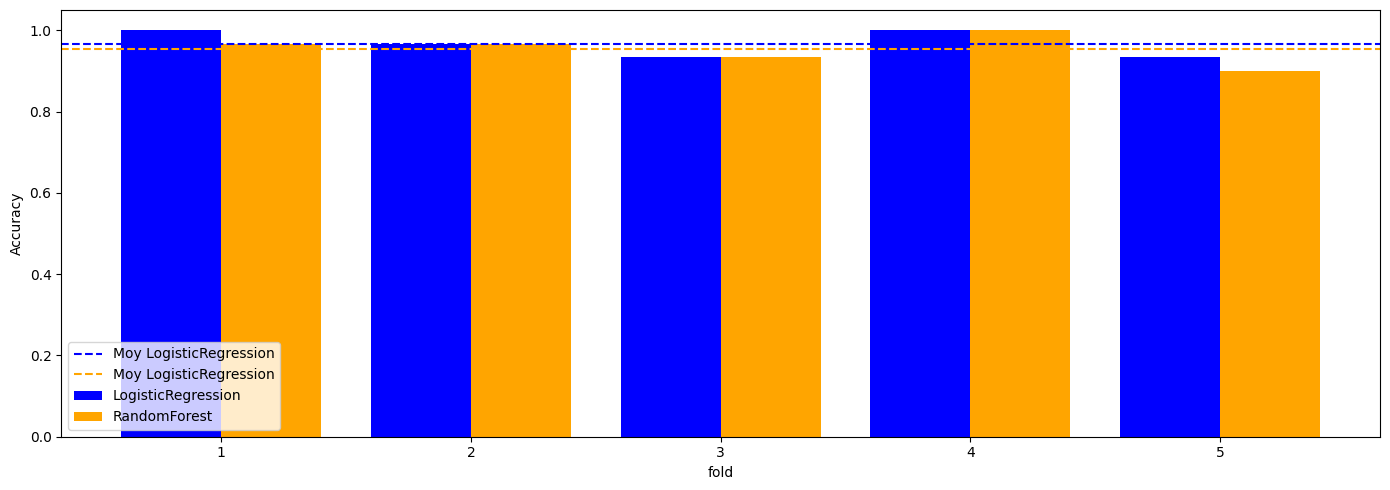

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(14, 5))

folds = np.arange(1, 6)
width = 0.40

axes.bar(
    folds - width / 2,
    results["LogisticRegression_skf5"]["test_accuracy"],
    width,
    color="blue",
    label="LogisticRegression",
)
axes.bar(
    folds + width / 2,
    results["RandomForestClassifier_skf5"]["test_accuracy"],
    width,
    color="orange",
    label="RandomForest",
)
axes.axhline(
    y=results["LogisticRegression_skf5"]["test_accuracy"].mean(),
    linestyle="--",
    color="blue",
    label="Moy LogisticRegression",
)
axes.axhline(
    y=results["RandomForestClassifier_skf5"]["test_accuracy"].mean(),
    linestyle="--",
    color="orange",
    label="Moy LogisticRegression",
)
axes.set_xlabel("fold")
axes.set_ylabel("Accuracy")
axes.legend()

plt.tight_layout()
plt.show()

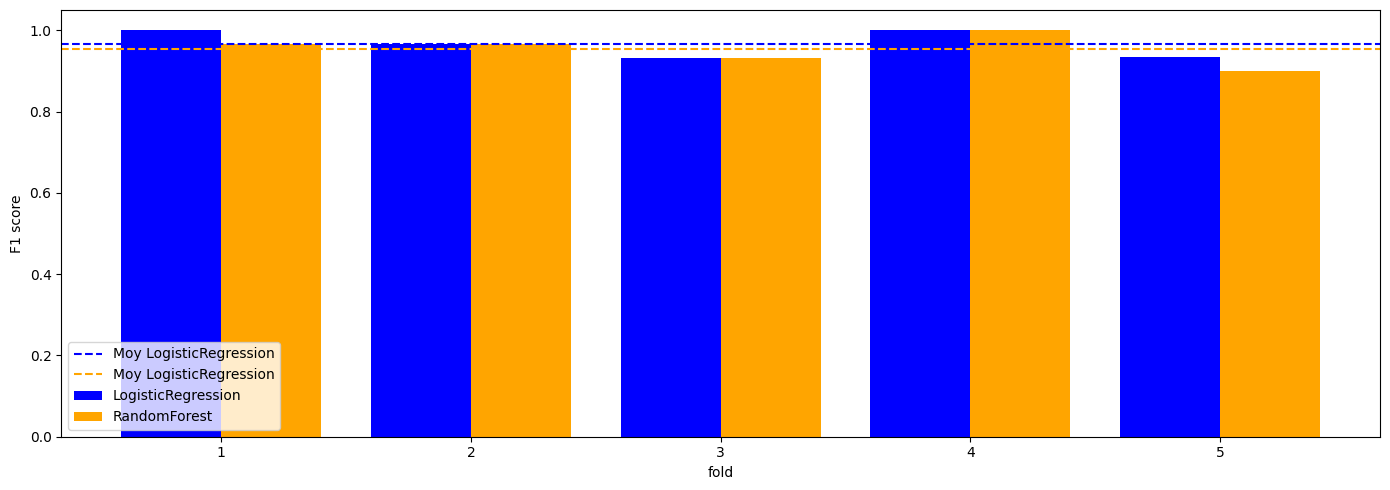

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(14, 5))

folds = np.arange(1, 6)
width = 0.40

axes.bar(
    folds - width / 2,
    results["LogisticRegression_skf5"]["test_f1_macro"],
    width,
    color="blue",
    label="LogisticRegression",
)
axes.bar(
    folds + width / 2,
    results["RandomForestClassifier_skf5"]["test_f1_macro"],
    width,
    color="orange",
    label="RandomForest",
)
axes.axhline(
    y=results["LogisticRegression_skf5"]["test_f1_macro"].mean(),
    linestyle="--",
    color="blue",
    label="Moy LogisticRegression",
)
axes.axhline(
    y=results["RandomForestClassifier_skf5"]["test_f1_macro"].mean(),
    linestyle="--",
    color="orange",
    label="Moy LogisticRegression",
)
axes.set_xlabel("fold")
axes.set_ylabel("F1 score")
axes.legend()

plt.tight_layout()
plt.show()